In [3]:
pip install ultralytics==8.3.13

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 16.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip show ultralytics

Name: ultralytics
Version: 8.3.13
Summary: Ultralytics YOLO for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: 
Author: 
Author-email: Glenn Jocher <glenn.jocher@ultralytics.com>, Jing Qiu <jing.qiu@ultralytics.com>
License: AGPL-3.0
Location: /opt/conda/lib/python3.10/site-packages
Requires: matplotlib, numpy, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, seaborn, torch, torchvision, tqdm, ultralytics-thop
Required-by: 


In [6]:
import os 
import matplotlib
import numpy
import cv2
import pandas
import PIL
import psutil
import cpuinfo
import yaml
import requests
import scipy
import seaborn
import torch
import torchvision
import tqdm
import ultralytics

print("All libraries imported successfully!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
All libraries imported successfully!


In [7]:
from ultralytics import YOLO
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 66.7MB/s]


In [8]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

In [9]:
model.info()

YOLO11n summary: 319 layers, 2,624,080 parameters, 0 gradients, 6.6 GFLOPs


(319, 2624080, 0, 6.614336)


image 1/1 /kaggle/input/image-for-predict/422946657_1843239819427840_4190706023266226446_n.jpg: 640x512 1 person, 95.2ms
Speed: 8.3ms preprocess, 95.2ms inference, 225.5ms postprocess per image at shape (1, 3, 640, 512)


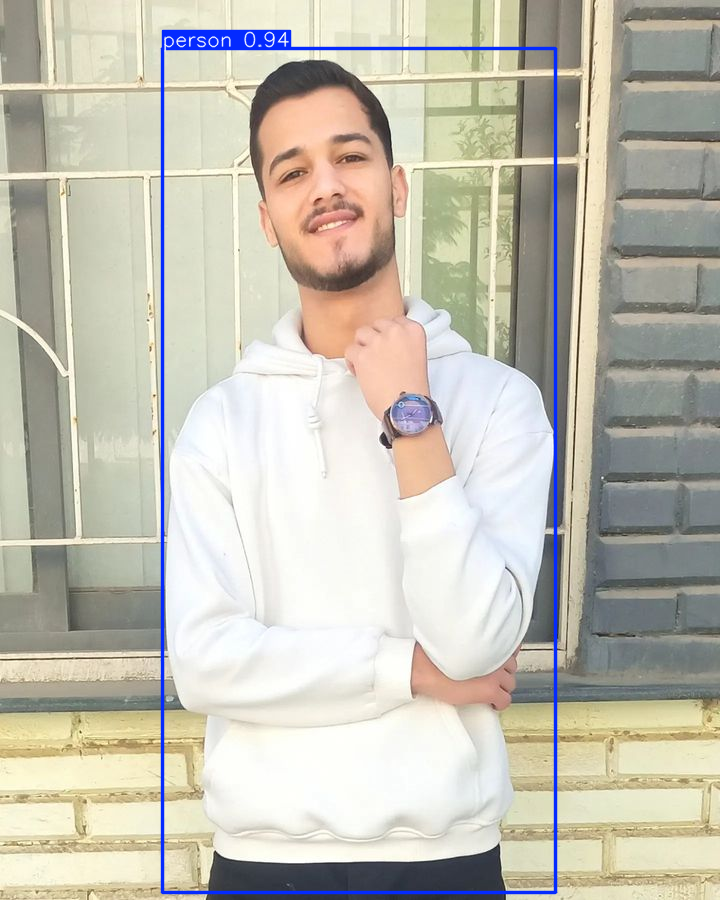

In [10]:
results = model('/kaggle/input/image-for-predict')
results[0].show()

In [11]:
# Display the results
for result in results:
    # Each result corresponds to one image
    detections = result.boxes  # Accessing the detections

    # Loop through each detection
    for detection in detections:
        # Get the class ID and confidence score
        class_id = detection.cls[0]  # Class ID
        confidence = detection.conf[0]  # Confidence score
        coordinates = detection.xyxy[0]  # Bounding box coordinates
        
        print(f'Class ID: {class_id}, Confidence: {confidence}, Coordinates: {coordinates}')


Class ID: 0.0, Confidence: 0.9423080086708069, Coordinates: tensor([162.3627,  48.2279, 555.9789, 892.9983], device='cuda:0')


<hr>

# Define the new content for data.yaml

In [12]:
new_data_yaml_content = """
train: /kaggle/input/drowsiness-detection-for-yolov8/train/images
val: /kaggle/input/drowsiness-detection-for-yolov8/valid/images
test: /kaggle/input/drowsiness-detection-for-yolov8/test/images

nc: 3
names: ["Drowsiness", "awake", "yawn"]
"""

# Create a new directory for the modified data.yaml file
new_data_yaml_dir = '/kaggle/working/drowsiness-detection'
os.makedirs(new_data_yaml_dir, exist_ok=True)

# Path to the new data.yaml file
new_data_yaml_path = os.path.join(new_data_yaml_dir, 'data.yaml')

# Save the new content to the new data.yaml file
with open(new_data_yaml_path, 'w') as file:
    file.write(new_data_yaml_content)


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# move model to cuda
model.to(device)
print(device)

cuda


# train model

In [16]:
# Train the model with specific hyperparameters
model.train(
    
    data='/kaggle/working/drowsiness-detection/data.yaml',    
    epochs=60,                    
    batch=16,                     
    imgsz=640,                    
    save=True,                    
    patience=10,                  
    device=0,                     
    val=True                      

)

New https://pypi.org/project/ultralytics/8.3.16 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.13 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/drowsiness-detection/data.yaml, epochs=60, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train25, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, 

train: Scanning /kaggle/input/drowsiness-detection-for-yolov8/train/labels... 12513 images, 27 backgrounds, 0 corrupt: 100%|██████████| 12513/12513 [00:11<00:00, 1055.54it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/drowsiness-detection-for-yolov8/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/drowsiness-detection-for-yolov8/valid/labels... 1191 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1191/1191 [00:01<00:00, 933.97it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/drowsiness-detection-for-yolov8/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train25/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)


TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train25
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      4.85G     0.5678     0.4168     0.9436         34        640:  15%|█▌        | 118/783 [00:27<02:31,  4.38it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       1/60      4.85G     0.5607     0.3917     0.9446         31        640:  32%|███▏      | 254/783 [00:56<01:47,  4.93it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       1/60      4.85G     0.5609     0.3915     0.9447         32        640:  33%|███▎      | 255/783 [00:57<02:06,  4.19it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       1/60      4.85G     0.5519     0.3834     0.9412         31        640:  50%|████▉     | 391/783 [01:27<01:25,  4.57it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       1/60      4.85G     0.5437     0.3773     0.9382         39        640:  68%|██████▊   | 531/783 [01:57<00:51,  4.92

                   all       1191       1190      0.944      0.951      0.982      0.875



wandb: ERROR Error while calling W&B API: run Ultralytics/bfkbom0m not found during createRunFiles (<Response [404]>)
wandb: ERROR Error while calling W&B API: run Ultralytics/bfkbom0m not found during createRunFiles (<Response [404]>)
wandb: ERROR Error while calling W&B API: run Ultralytics/bfkbom0m not found during createRunFiles (<Response [404]>)
wandb: ERROR Error while calling W&B API: run Ultralytics/bfkbom0m not found during createRunFiles (<Response [404]>)
wandb: ERROR Error while calling W&B API: run Ultralytics/bfkbom0m not found during createRunFiles (<Response [404]>)
wandb: ERROR Error while calling W&B API: run Ultralytics/bfkbom0m not found during createRunFiles (<Response [404]>)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/opt/conda/lib/python3.10/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/opt/conda/lib/python3.10/multiprocessing/con


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


wandb: ERROR Error while calling W&B API: run Ultralytics/bfkbom0m not found during createRunFiles (<Response [404]>)
  0%|          | 0/783 [00:00<?, ?it/s]wandb: ERROR Error while calling W&B API: run Ultralytics/bfkbom0m not found during createRunFiles (<Response [404]>)
       2/60      2.63G     0.5088     0.3348     0.9222         35        640:  16%|█▋        | 128/783 [00:27<02:24,  4.53it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       2/60      2.63G     0.5103     0.3374     0.9224         38        640:  34%|███▍      | 269/783 [00:57<01:54,  4.49it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       2/60      2.63G     0.5102     0.3399     0.9228         38        640:  52%|█████▏    | 408/783 [01:27<01:23,  4.50it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       2/60      2.63G      0.509     0.3369     0.9228         29        640:  69%|██████▉   | 544/783 [01:57<00:57,  4.1

                   all       1191       1190      0.955      0.943      0.979      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      2.61G      0.548     0.3462     0.9651         33        640:   1%|          | 6/783 [00:00<02:00,  6.44it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       3/60      2.61G     0.5063     0.3364     0.9181         33        640:  18%|█▊        | 142/783 [00:31<02:18,  4.64it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       3/60      2.61G     0.5281     0.3503      0.927         36        640:  36%|███▌      | 279/783 [01:01<01:51,  4.51it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       3/60      2.61G     0.5417     0.3627     0.9324         33        640:  53%|█████▎    | 414/783 [01:30<01:16,  4.81it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       3/60      2.61G     0.5491     0.3715     0.9349         41        640:  70%|███████   | 551/783 [02:01<00:50,  4.62it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.lo

                   all       1191       1190      0.941      0.935      0.978      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      2.59G     0.6123     0.4209     0.9479         41        640:   1%|▏         | 10/783 [00:01<02:20,  5.52it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       4/60      2.59G     0.6209     0.4459     0.9569         27        640:  19%|█▉        | 148/783 [00:31<02:07,  5.00it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       4/60      2.59G     0.6263     0.4529      0.963         34        640:  36%|███▌      | 283/783 [01:01<02:03,  4.05it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       4/60      2.59G      0.627     0.4538     0.9633         31        640:  54%|█████▎    | 420/783 [01:31<01:28,  4.12it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       4/60      2.59G     0.6317     0.4547      0.966         35        640:  71%|███████▏  | 558/783 [02:01<00:59,  3.78it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.l

                   all       1191       1190       0.94      0.938      0.981      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      2.59G     0.6143     0.4265     0.9476         35        640:   3%|▎         | 21/783 [00:03<02:45,  4.62it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       5/60      2.59G     0.6339     0.4529     0.9637         37        640:  20%|█▉        | 156/783 [00:34<02:02,  5.13it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       5/60      2.59G     0.6314     0.4542     0.9668         35        640:  37%|███▋      | 293/783 [01:04<01:59,  4.11it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       5/60      2.59G     0.6301     0.4532     0.9671         29        640:  55%|█████▍    | 430/783 [01:34<01:23,  4.24it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       5/60      2.59G     0.6327     0.4581     0.9686         34        640:  73%|███████▎  | 568/783 [02:04<00:50,  4.29it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.l

                   all       1191       1190      0.942      0.919      0.974      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      2.59G     0.6007     0.4676     0.9486         41        640:   4%|▎         | 28/783 [00:05<02:38,  4.76it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       6/60      2.59G     0.6209     0.4489     0.9619         38        640:  21%|██        | 164/783 [00:35<02:08,  4.80it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       6/60      2.59G     0.6226     0.4537     0.9645         36        640:  38%|███▊      | 301/783 [01:05<01:43,  4.67it/s]wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
       6/60      2.59G     0.6246     0.4547     0.9657         35        640:  45%|████▍     | 352/783 [01:16<01:34,  4.57it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


KeyboardInterrupt: 

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)


In [27]:
final_model = YOLO('/kaggle/working/runs/detect/train2/weights/best.pt')

In [28]:
metrics = final_model.val(data='/kaggle/working/drowsiness-detection/data.yaml', split='test')  # Evaluate on the test set

Ultralytics 8.3.13 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /kaggle/input/drowsiness-detection-for-yolov8/test/labels... 593 images, 1 backgrounds, 0 corrupt: 100%|██████████| 593/593 [00:00<00:00, 912.27it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/drowsiness-detection-for-yolov8/test is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:05<00:00,  6.87it/s]


                   all        593        593      0.958      0.954      0.988      0.879
            Drowsiness        162        162      0.963      0.914      0.984      0.905
                 awake        247        247      0.963      0.984      0.992      0.914
                  yawn        184        184      0.947      0.966      0.987      0.817
Speed: 0.1ms preprocess, 3.2ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val5


wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)



image 1/1 /kaggle/input/image-for-predict/422946657_1843239819427840_4190706023266226446_n.jpg: 640x512 1 awake, 11.2ms
Speed: 3.0ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


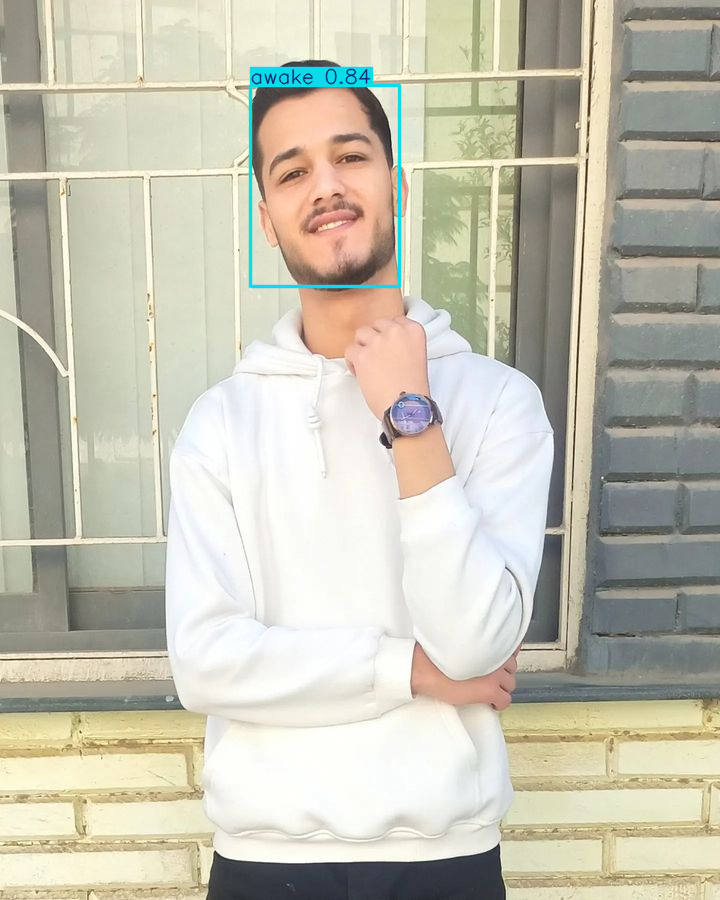

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)


In [33]:
results = final_model('/kaggle/input/image-for-predict')
results[0].show()

In [14]:
model_with_bestweights_from_32_epochs = YOLO('/kaggle/input/best-weights/best_weights.pt')

<hr>

In [15]:
# Load the YOLO model with best weights
model_with_newtraining = YOLO('/kaggle/input/best-weights/best_weights.pt')  # Path to your best weights

# Train the model again for 30 more epochs
model_with_newtraining.train(
    data='/kaggle/working/drowsiness-detection/data.yaml',  
    epochs=30,                                              
    batch=8,                                                
    imgsz=640,                                              
    save=True,                                              
    patience=10,                                            
    device=0,                                               
    val=True                                                
)

New https://pypi.org/project/ultralytics/8.3.17 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.13 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/input/best-weights/best_weights.pt, data=/kaggle/working/drowsiness-detection/data.yaml, epochs=30, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fa

100%|██████████| 755k/755k [00:00<00:00, 13.6MB/s]
2024-10-19 16:11:15,902	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-19 16:11:16,677	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...
AMP: checks passed ✅


train: Scanning /kaggle/input/drowsiness-detection-for-yolov8/train/labels... 12513 images, 27 backgrounds, 0 corrupt: 100%|██████████| 12513/12513 [00:48<00:00, 255.60it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/drowsiness-detection-for-yolov8/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/drowsiness-detection-for-yolov8/valid/labels... 1191 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1191/1191 [00:04<00:00, 289.27it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/drowsiness-detection-for-yolov8/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       1.5G     0.5785      0.404     0.9507          2        640: 100%|██████████| 1565/1565 [03:27<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:08<00:00,  8.54it/s]

                   all       1191       1190      0.959       0.95      0.983      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      1.48G     0.6251     0.4429     0.9701          2        640: 100%|██████████| 1565/1565 [03:14<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:07<00:00, 10.55it/s]

                   all       1191       1190      0.951       0.96      0.983      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      1.48G     0.6557     0.4764     0.9815          2        640: 100%|██████████| 1565/1565 [03:10<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:07<00:00, 10.31it/s]

                   all       1191       1190      0.956       0.95      0.982      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      1.48G      0.657     0.4797     0.9848          1        640: 100%|██████████| 1565/1565 [03:07<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:07<00:00, 10.58it/s]

                   all       1191       1190      0.927      0.951      0.979      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.48G     0.6406     0.4663     0.9751          3        640: 100%|██████████| 1565/1565 [03:07<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:07<00:00, 10.09it/s]

                   all       1191       1190      0.944      0.948       0.98       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.48G     0.6372     0.4584     0.9758          0        640: 100%|██████████| 1565/1565 [03:08<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:06<00:00, 10.84it/s]

                   all       1191       1190      0.956      0.947      0.982      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.48G      0.628     0.4531     0.9724          1        640: 100%|██████████| 1565/1565 [03:06<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:06<00:00, 10.74it/s]

                   all       1191       1190      0.959      0.947      0.985      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.48G     0.6208     0.4446     0.9676          4        640: 100%|██████████| 1565/1565 [03:06<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:06<00:00, 10.83it/s]

                   all       1191       1190      0.948      0.954      0.983      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.48G     0.6152     0.4382     0.9658          4        640: 100%|██████████| 1565/1565 [03:06<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:07<00:00, 10.68it/s]

                   all       1191       1190      0.964      0.937      0.982      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.48G     0.6041     0.4344     0.9588          4        640: 100%|██████████| 1565/1565 [03:06<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:06<00:00, 10.86it/s]

                   all       1191       1190      0.938      0.956      0.981      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.48G     0.6014     0.4266     0.9601          4        640: 100%|██████████| 1565/1565 [03:07<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:07<00:00, 10.58it/s]

                   all       1191       1190       0.95      0.952      0.983      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.48G     0.5967     0.4182     0.9565          2        640: 100%|██████████| 1565/1565 [03:05<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:06<00:00, 10.85it/s]

                   all       1191       1190      0.949      0.953      0.984       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.48G     0.5859     0.4154     0.9548          1        640: 100%|██████████| 1565/1565 [03:05<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:06<00:00, 10.74it/s]

                   all       1191       1190      0.944      0.964      0.984      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.48G      0.586     0.4141     0.9549          4        640: 100%|██████████| 1565/1565 [03:06<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:06<00:00, 10.87it/s]

                   all       1191       1190      0.949      0.958      0.981      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      1.48G     0.5822     0.4054     0.9529          2        640: 100%|██████████| 1565/1565 [03:06<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:07<00:00, 10.64it/s]

                   all       1191       1190      0.954      0.949      0.981       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.48G     0.5779     0.4006     0.9496          1        640: 100%|██████████| 1565/1565 [03:07<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:06<00:00, 10.85it/s]

                   all       1191       1190      0.968      0.943      0.984      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      1.48G     0.5753     0.4001     0.9499          2        640: 100%|██████████| 1565/1565 [03:06<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:07<00:00, 10.54it/s]

                   all       1191       1190      0.956      0.949      0.981       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.48G     0.5686     0.3873     0.9436          4        640: 100%|██████████| 1565/1565 [03:06<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:07<00:00, 10.50it/s]

                   all       1191       1190      0.948      0.954      0.981      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      1.48G      0.563     0.3916     0.9441          1        640: 100%|██████████| 1565/1565 [03:05<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:07<00:00, 10.19it/s]

                   all       1191       1190      0.949      0.958      0.982      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.48G     0.5545     0.3784     0.9433          2        640: 100%|██████████| 1565/1565 [03:06<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:07<00:00, 10.27it/s]


                   all       1191       1190       0.96      0.954      0.982      0.876
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      1.48G     0.5044     0.2673      0.907          1        640: 100%|██████████| 1565/1565 [03:03<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:07<00:00, 10.10it/s]

                   all       1191       1190      0.956      0.947      0.982      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      1.48G     0.4976     0.2687     0.9016          1        640: 100%|██████████| 1565/1565 [03:01<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:07<00:00, 10.39it/s]

                   all       1191       1190      0.953      0.952      0.982      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.48G     0.4901     0.2587      0.901          1        640: 100%|██████████| 1565/1565 [03:01<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:07<00:00, 10.40it/s]


                   all       1191       1190      0.947      0.959      0.981      0.877

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      1.48G     0.4799     0.2548      0.893          1        640: 100%|██████████| 1565/1565 [03:00<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:07<00:00, 10.66it/s]

                   all       1191       1190      0.951      0.956      0.982       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      1.48G      0.475     0.2461     0.8929          1        640: 100%|██████████| 1565/1565 [03:01<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:06<00:00, 10.88it/s]

                   all       1191       1190      0.952      0.955       0.98      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      1.48G     0.4706     0.2439     0.8904          1        640: 100%|██████████| 1565/1565 [03:01<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:06<00:00, 10.90it/s]

                   all       1191       1190      0.958      0.955      0.981      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      1.48G     0.4639     0.2381     0.8867          1        640: 100%|██████████| 1565/1565 [03:00<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:06<00:00, 10.81it/s]

                   all       1191       1190      0.955      0.955      0.979      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      1.48G     0.4585     0.2328      0.886          1        640: 100%|██████████| 1565/1565 [03:01<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:06<00:00, 11.01it/s]

                   all       1191       1190      0.956      0.957      0.981       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      1.48G      0.453     0.2266     0.8831          1        640: 100%|██████████| 1565/1565 [03:04<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:06<00:00, 10.94it/s]

                   all       1191       1190      0.945      0.959       0.98       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      1.48G      0.448     0.2228     0.8837          1        640: 100%|██████████| 1565/1565 [03:03<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:06<00:00, 10.76it/s]

                   all       1191       1190      0.955      0.952      0.979      0.878



30 epochs completed in 1.620 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.13 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:08<00:00,  9.34it/s]


                   all       1191       1190      0.956      0.957      0.981      0.881
            Drowsiness        280        280       0.94      0.939      0.973      0.906
                 awake        538        538      0.954      0.973      0.987      0.917
                  yawn        372        372      0.973       0.96      0.984      0.819
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▃▆██▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
lr/pg1,▃▆██▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
lr/pg2,▃▆██▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
metrics/mAP50(B),▆▆▄▁▁▄█▅▄▃▆▆▆▃▃▆▃▃▄▄▄▄▃▄▁▃▁▃▁▃
metrics/mAP50-95(B),▄▂▃▁▂▃▃▄▅▅▅▆▆▅▆▆▆▆▆▇▇▇▇███████
metrics/precision(B),▇▅▆▁▄▆▇▅▇▃▅▅▄▅▆█▆▅▅▇▆▅▄▅▅▆▆▆▄▆
metrics/recall(B),▄▇▄▅▄▄▄▅▁▆▅▅█▇▄▃▄▅▇▅▄▅▇▆▆▆▆▆▇▆
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▅▇██▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▃▃▂▂▂▂▂▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7adec4fbcd30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [18]:
model_with_bestweights_from_62_epochs = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

In [19]:
metrics_on_testdata = model_with_bestweights_from_62_epochs.val(data='/kaggle/working/drowsiness-detection/data.yaml', split='test')

Ultralytics 8.3.13 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /kaggle/input/drowsiness-detection-for-yolov8/test/labels... 593 images, 1 backgrounds, 0 corrupt: 100%|██████████| 593/593 [00:02<00:00, 197.96it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/drowsiness-detection-for-yolov8/test is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:05<00:00,  6.58it/s]


                   all        593        593       0.96      0.951      0.983      0.884
            Drowsiness        162        162      0.961      0.926      0.979      0.907
                 awake        247        247      0.973      0.972      0.992      0.922
                  yawn        184        184      0.948      0.957      0.977      0.824
Speed: 0.2ms preprocess, 3.6ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val



image 1/1 /kaggle/input/image-for-predict/422946657_1843239819427840_4190706023266226446_n.jpg: 640x512 1 awake, 88.2ms
Speed: 2.5ms preprocess, 88.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


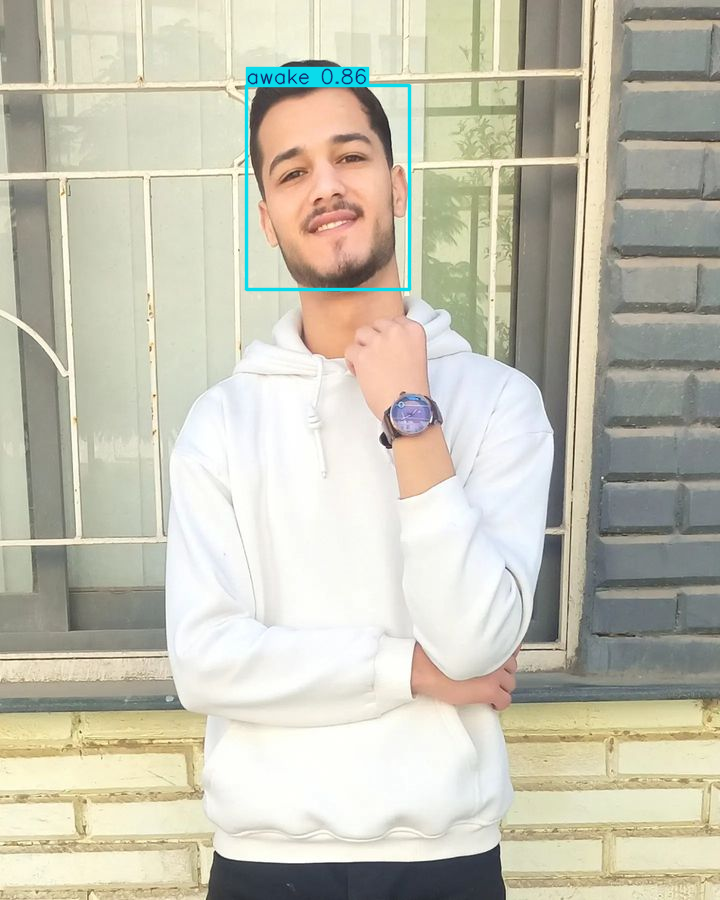

In [20]:
results = model_with_bestweights_from_62_epochs('/kaggle/input/image-for-predict')
results[0].show()

<hr>